## **Лабораторная работа 3**

### Pandas

#### No1 (3 балла)

##### 1. Создайте объект Series, значениями которого являются целые числа от 1 до 5, а индексами символы 'a', 'b', 'c', 'd', 'e'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
series = pd.Series(range(1, 6), ["a", "b", "c", "d", "e"])
print(series)


a    1
b    2
c    3
d    4
e    5
dtype: int64


##### 2. С помощью обращения по явному индексу получите значение 4

In [3]:
print(series["d"])


4


##### 3. С помощью обращения по неявному индексу получите значение 2.


In [4]:
print(series[1])


2


##### 4. Добавьте в серию новый элемент.


In [5]:
series["f"] = 6
print(series)


a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64


##### 5. Используя операцию среза, получите значения 3, 4, 5.

In [6]:
print(series[2:5])


c    3
d    4
e    5
dtype: int64


##### 6. Создайте объект DataFrame из списка [[1, 2], [5, 3], [3.7, 4.8]] с именами столбцов col1 и col2.

In [7]:
dataframe = pd.DataFrame([[1, 2], [5, 3], [3.7, 4.8]], columns=["col1", "col2"])
dataframe


,col1,col2
0,1.0,2.0
1,5.0,3.0
2,3.7,4.8


##### 7. Используя операцию индексации, получите элемент 3.7.


In [8]:
print(dataframe["col1"][2])


3.7


##### 8. Измените элемент 3 на 9.

In [9]:
dataframe["col2"][1] = 9
dataframe


,col1,col2
0,1.0,2.0
1,5.0,9.0
2,3.7,4.8


##### 9. Используя операцию среза, получите строки с индексами 1 и 2

In [10]:
dataframe[::][1:3]


,col1,col2
1,5.0,9.0
2,3.7,4.8


##### 10. Добавьте столбец col3, значения которого – результат поэлементного перемножения col1 и col2.

In [11]:
dataframe["col3"] = dataframe["col1"] * dataframe["col2"]
dataframe


,col1,col2,col3
0,1.0,2.0,2.00
1,5.0,9.0,45.00
2,3.7,4.8,17.76


#### No2 (4 балла)

Дан список списков data.


In [12]:
data = [["Вжик", "Zipper the Fly", "fly", "0.7"],
        ["Гайка", "Gadget Hackwrench", "mouse", None],
        ["Дейл", "Dale", "chipmunk", "1"],
        ["Рокфор", "Monterey Jack", "mouse", "0.8"],
        ["Чип", "Chip", "chipmunk", "0.2"]]


На первом месте указывается имя героя на русском (ru_name), затем имя на английском
(en_name), вид героя (class) и индекс веселости, который измеряется в «Дейлах» (cheer).

##### 1. На основе этого списка создайте датафрейм dataframe так, чтобы каждому показателю (ru_name, en_name, class, cheer) соответствовал один столбец датафрейма.

Проверьте, что последний столбец является числовым. Если нет, приведите его к
типу float.

In [13]:
dataframe = pd.DataFrame(data)

print(dataframe)
print(dataframe[3].dtype)

dataframe[3] = dataframe[3].astype("float")
print(dataframe[3].dtype)


        0                  1         2     3
0    Вжик     Zipper the Fly       fly   0.7
1   Гайка  Gadget Hackwrench     mouse  None
2    Дейл               Dale  chipmunk     1
3  Рокфор      Monterey Jack     mouse   0.8
4     Чип               Chip  chipmunk   0.2
object
float64


##### 2. Выведите число строк датафрейма dataframe.

In [14]:
len(dataframe.index)


5

##### 3. Выведите число заполненных (не NaN) ячеек в последнем столбце.

In [15]:
dataframe[3].count()


4

##### 4. Выведите значение в ячейке, которая находится на пересечении третьей строки и второго столбца.

In [16]:
dataframe.loc[2][1]


'Dale'

##### 5. Сохраните в переменную dataframe1 строки датафрейма dataframe со второй по четвертую включительно и столбцы с первого по третий включительно. Продемонстрируйте содержимое dataframe1.


In [17]:
dataframe1 = dataframe.loc[1:3, 0:2]
dataframe1


,0,1,2
1,Гайка,Gadget Hackwrench,mouse
2,Дейл,Dale,chipmunk
3,Рокфор,Monterey Jack,mouse


##### 6. Присвойте столбцам датафрейма dataframe следующие названия: ru_name, en_name, class, cheer.

In [18]:
dataframe.columns = ["ru_name", "en_name", "class", "cheer"]

dataframe


,ru_name,en_name,class,cheer
0,Вжик,Zipper the Fly,fly,0.7
1,Гайка,Gadget Hackwrench,mouse,NaN
2,Дейл,Dale,chipmunk,1.0
3,Рокфор,Monterey Jack,mouse,0.8
4,Чип,Chip,chipmunk,0.2


##### 7. Добавьте в датафрейм dataframe столбец logcheer, который содержит логарифмированные значения cheer (если в cheer встречается NaN, то и в logcheer тоже).

In [19]:
dataframe["logcheer"] = dataframe["cheer"].apply(np.log)

dataframe


,ru_name,en_name,class,cheer,logcheer
0,Вжик,Zipper the Fly,fly,0.7,-0.356675
1,Гайка,Gadget Hackwrench,mouse,NaN,NaN
2,Дейл,Dale,chipmunk,1.0,0.000000
3,Рокфор,Monterey Jack,mouse,0.8,-0.223144
4,Чип,Chip,chipmunk,0.2,-1.609438


##### 8. Сохраните массив уникальных значений столбца class в переменную x, а соответствующие им частоты (сколько раз значение встречается в столбце) — в переменную y. 
Используя полученные x и y, постройте столбиковую диаграмму,
barplot, для class. Добавьте заголовок и подписи к осям.

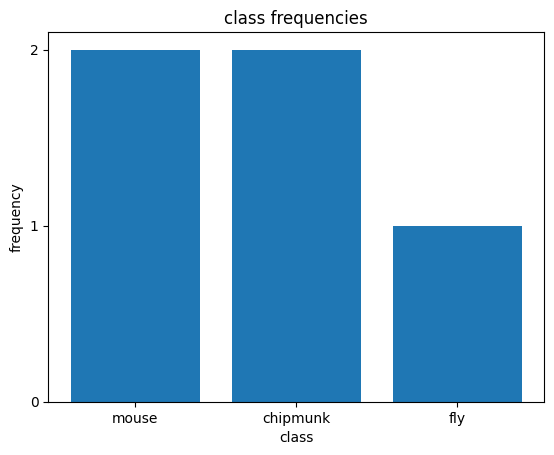

In [20]:
x = dataframe["class"].value_counts().index
y = dataframe["class"].value_counts().values

plt.title("class frequencies")
plt.xlabel("class")
plt.ylabel("frequency")
plt.yticks((min(y) - 1, max(y), 1))
plt.bar(x, y)

plt.show()


#### No3 (4 балла)

Посмотрите информацию о наборе данных о преступности в Лос-Анджелесе
(https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z). Используя
Pandas, выполните следующие действия:

##### 1. Загрузите случайную выборку из этого набора и далее работайте с ней:
https://github.com/slemeshevsky/python-course-ipynb/blob/master/src-pandas/la-crimes-sample.csv.zip

In [21]:
dataframe = pd.read_csv("csv/la-crimes-sample.csv")


##### 2. Сколько строк и столбцов в таблице?

In [22]:
print("cols count = ", len(dataframe.columns))
print("rows count = ", len(dataframe.index))


cols count =  27
rows count =  39608


##### 3. Каковы названия столбцов? Какие типы данных у столбцов?

In [23]:
dtypes = dataframe.dtypes
dataframe2 = pd.DataFrame(dtypes.items(), columns=["name", "dtype"])
dataframe2


,name,dtype
0,Unnamed: 0,int64
1,DR Number,int64
2,Date Reported,object
3,Date Occurred,object
4,Time Occurred,int64
5,Area ID,int64
6,Area Name,object
7,Reporting District,int64
8,Crime Code,int64
9,Crime Code Description,object


##### 4. Сколько в каждом из них уникальных значений?

In [24]:
dataframe.nunique()


Unnamed: 0                39608
DR Number                 39608
Date Reported              2809
Date Occurred              2808
Time Occurred               900
Area ID                      21
Area Name                    21
Reporting District         1135
Crime Code                  115
Crime Code Description      113
MO Codes                  14019
Victim Age                   90
Victim Sex                    4
Victim Descent               17
Premise Code                189
Premise Description         170
Weapon Used Code             65
Weapon Description           65
Status Code                   6
Status Description            6
Crime Code 1                116
Crime Code 2                 67
Crime Code 3                  9
Crime Code 4                  2
Address                   19762
Cross Street               2064
Location                  19048
dtype: int64

##### 5. Сколько пропущенных значений?

In [25]:
dataframe.isnull().sum().sum()


217184

##### 6. Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?

In [26]:
males = dataframe["Victim Sex"].value_counts()["M"]
females = dataframe["Victim Sex"].value_counts()["F"]

print("Male victims =", males, "female victims =", females)
print(females > males)


Male victims = 18564 female victims = 16792
False


##### 7. Определите 10 самых распространенных преступлений в Лос-Анджелесе. Постройте график.

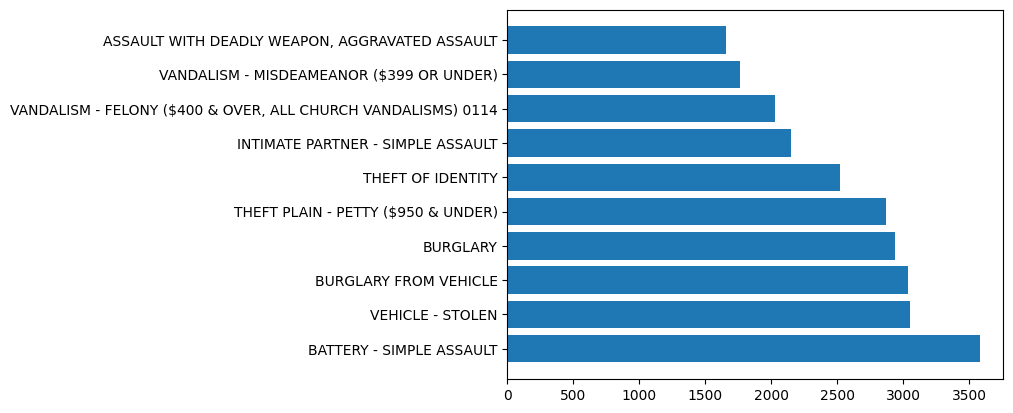

In [27]:
top_crime_types = dataframe["Crime Code Description"].value_counts()[:10]
x = top_crime_types.index
y = top_crime_types.values

plt.barh(x, y)
plt.show()

##### 8. От каких преступлений чаще страдают женщины, а от каких мужчины?

In [28]:
victims = dataframe.groupby(["Victim Sex"])

males = victims.get_group("M")["Crime Code Description"].value_counts()[:10]
females = victims.get_group("F")["Crime Code Description"].value_counts()[:10]

print("Males:\n", males)
print("\nFemales:\n", females)


Males:
 BATTERY - SIMPLE ASSAULT                                        1731
BURGLARY FROM VEHICLE                                           1665
BURGLARY                                                        1632
THEFT PLAIN - PETTY ($950 & UNDER)                              1499
THEFT OF IDENTITY                                               1262
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  1213
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    1185
ROBBERY                                                         1024
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         938
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036     791
Name: Crime Code Description, dtype: int64

Females:
 BATTERY - SIMPLE ASSAULT                                        1838
INTIMATE PARTNER - SIMPLE ASSAULT                               1764
BURGLARY FROM VEHICLE                                           1361
THEFT PLAIN - PETTY ($950 & UNDER)       

##### 9. Люди какого происхождения чаще всего подвергаются преступлениям?

In [29]:
dataframe["Victim Descent"].value_counts()[:5]


H    13488
W     9884
B     6449
O     3935
X     1028
Name: Victim Descent, dtype: int64

##### 10. Отсортируйте районы, по количеству преступлений. Постройте график, показывающий самые безопасный и опасный районы.

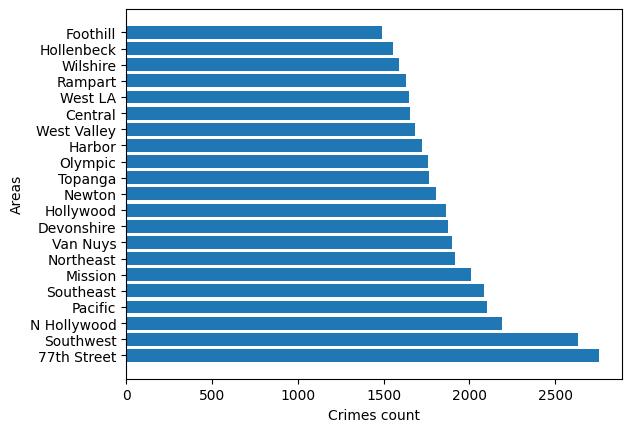

In [30]:
areas = dataframe["Area Name"].value_counts()

plt.ylabel("Areas")
plt.xlabel("Crimes count")
plt.barh(areas.index, areas.values)
plt.show()


#### No4 (4 балла)

В файле polit.csv (https://cloud.mail.ru/public/P5P7/qjm2F8CuN) хранятся некоторые данные,
используемые в исследовании James W.McGuire, “Authoritarianism in the Middle East”.
Показатели:
 - ctry – страна;
 - fh09 – индекс Freedom House за 2009 год (от 1 до 7, большие значения соответствуют
меньшему уровню гражданских свобод);
- polity09 – индекс Polity2 за 2009 год (от -10 до 10, большие значения соответствуют
большему уровню демократии);
- gini – индекс Джини за 2000-2010 годы (индекс имущественного неравенства);
- fparl08 – доля женщин в парламенте в 2008 году (в процентах);
- mena – регион Middle East and North Africa (1 – да, 0 – нет);
- lati – регион Latin America;
- cari – регион Caribbean, former British, French, Dutch colony;
- east – регион East Asia;
- sovi – регион Former Soviet Bloc;
- afri – регион Africa;
- corr0509 – индекс Control of Corruption, среднее за 2005-2009 годы.

Выполните следующие задания:

##### 1. Загрузите датафрейм из файла polit.csv и сохраните его в переменную polit. Если в датафрейме есть строки с пропущенными значениями, то удалите их

In [31]:
polit = pd.read_csv("csv/polit.csv").dropna()
polit


,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
1,1,Albania,3.0,9.0,33.0,7.14,0,0,0,0,1,0,-0.580513
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793
8,8,Armenia,5.0,5.0,30.2,8.40,0,0,0,0,0,0,-0.578211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,"Venezuela, RB",4.5,-3.0,43.4,18.56,0,1,0,0,0,0,-1.061680
207,207,Vietnam,6.0,-7.0,37.8,25.76,0,0,0,1,0,0,-0.656128
210,210,"Yemen, Rep.",5.5,-2.0,37.7,0.73,1,0,0,0,0,0,-0.808840
211,211,Zambia,3.5,7.0,50.7,15.19,0,0,0,0,0,1,-0.601142


##### 2. Выберите в датафрейме строки, которые соответствуют странам со значениями индекса Freedom House (fh09) выше 5.

In [32]:
polit[polit["fh09"] > 5]


,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684
12,12,Azerbaijan,5.5,-7.0,16.8,11.38,0,0,0,0,0,0,-1.026767
17,17,Belarus,6.5,-7.0,28.8,32.53,0,0,0,0,0,0,-0.765586
31,31,Cambodia,5.5,2.0,44.2,15.76,0,0,0,1,0,0,-1.151233
32,32,Cameroon,6.0,-4.0,44.6,13.89,0,0,0,0,0,1,-1.000362
37,37,Chad,6.5,-2.0,39.8,5.16,0,0,0,0,0,1,-1.346880
40,40,China,6.5,-7.0,41.5,21.33,0,0,0,1,0,0,-0.568752
43,43,"Congo, Dem. Rep.",6.0,5.0,44.4,7.73,0,0,0,0,0,1,-1.428074
44,44,"Congo, Rep.",5.5,-4.0,47.3,9.18,0,0,0,0,0,1,-1.113118


##### 3. Выберите в датафрейме строки, которые соответствуют странам Африки (afri) с процентом женщин в парламенте (fparl08) выше 30%.

In [33]:
polit[polit["afri"] & (polit["fparl08"] > 30)]


,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
30,30,Burundi,4.5,6.0,33.3,31.74,0,0,0,0,0,1,-1.095802
133,133,Mozambique,3.5,5.0,47.1,34.80,0,0,0,0,0,1,-0.524405
160,160,Rwanda,5.5,-3.0,46.7,50.94,0,0,0,0,0,1,-0.164223
174,174,South Africa,2.0,9.0,57.8,33.92,0,0,0,0,0,1,0.332960
187,187,Tanzania,3.5,-1.0,34.6,30.41,0,0,0,0,0,1,-0.439213
198,198,Uganda,4.5,-1.0,42.6,30.72,0,0,0,0,0,1,-0.819751


##### 4. Выберите в датафрейме строки, которые соответствуют странам Африки или Латинской Америки (afri и lati) со значением индекса Polity2 (polity09) больше или равным 8.

In [34]:
polit[(polit["afri"] | polit["lati"]) & (polit["polity09"] >= 8)]


,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793
25,25,Botswana,2.5,8.0,61.0,11.11,0,0,0,0,0,1,0.947725
26,26,Brazil,2.0,8.0,55.0,9.43,0,1,0,0,0,0,-0.119536
39,39,Chile,1.0,10.0,52.0,12.66,0,1,0,0,0,0,1.370524
42,42,Comoros,3.5,9.0,64.3,3.03,0,0,0,0,0,1,-0.709136
45,45,Costa Rica,1.0,10.0,48.9,36.84,0,1,0,0,0,0,0.483973
54,54,Dominican Republic,2.0,8.0,48.4,17.14,0,1,0,0,0,0,-0.618924
57,57,El Salvador,2.5,8.0,46.9,16.67,0,1,0,0,0,0,-0.288100
71,71,Ghana,1.5,8.0,42.8,7.89,0,0,0,0,0,1,-0.031224
77,77,Guatemala,4.0,8.0,53.7,12.03,0,1,0,0,0,0,-0.681574


##### 5. Добавьте в датафрейм polit столбец corr_round, в котором будут храниться округленные до 2 знака после запятой значения индекса Control of Corruption (corr0509).

In [35]:
polit["corr_round"] = polit["corr0509"].round(2)
polit.iloc[:, -2:]


,corr0509,corr_round
1,-0.580513,-0.58
2,-0.434654,-0.43
5,-1.292684,-1.29
7,-0.420793,-0.42
8,-0.578211,-0.58
...,...,...
206,-1.061680,-1.06
207,-0.656128,-0.66
210,-0.808840,-0.81
211,-0.601142,-0.60


##### 6. Добавьте в датафрейм polit столбец fh_status, в котором будут храниться типы стран в зависимости от значения индекса Freedom House (значения free, partly free, not free).
Соответствие значений fh09 с типами стран см. здесь
https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdataframe (Table
3 на последней странице).

In [36]:
def table3(fh_index):
    if fh_index >= 1 and fh_index <= 2.5:
        return "Free"
    if fh_index >= 3.0 and fh_index <= 5.0:
        return "Partly Free"
    if fh_index >= 5.5 and fh_index <= 7.0:
        return "Not Free"

polit["fh_status"] = polit["fh09"].map(table3)

polit[["fh09", "fh_status"]]


,fh09,fh_status
1,3.0,Partly Free
2,5.5,Not Free
5,5.5,Not Free
7,2.0,Free
8,5.0,Partly Free
...,...,...
206,4.5,Partly Free
207,6.0,Not Free
210,5.5,Not Free
211,3.5,Partly Free


##### 7. Сгруппируйте строки в таблице в соответствии со значениями столбца fh_status, полученного в предыдущей части и выведите минимальное, среднее и максимальное значение показателя gini (индекс Джини) по каждой группе.

In [37]:
groups = polit.groupby(["fh_status"])
fh_statuses = polit["fh_status"].unique()

for status in fh_statuses:
    group = groups.get_group(status)
    min_gini = group["gini"].min()
    max_gini = group["gini"].max()
    avg_gini = group["gini"].mean()
    
    print("\nStatus:", status, "\nMin:", min_gini, "\nMax:", max_gini, "\nAvg:", avg_gini)
    


Status: Partly Free 
Min: 29.8 
Max: 64.3 
Avg: 43.93125

Status: Not Free 
Min: 16.8 
Max: 58.6 
Avg: 39.75

Status: Free 
Min: 24.7 
Max: 74.3 
Avg: 38.170175438596495


##### 8. Сгруппируйте строки в таблице в соответствии со значениями столбца fh_status и запишите строки, относящиеся к разным группам, в отдельные csv-файлы.

In [38]:
groups = polit.groupby(["fh_status"])
fh_statuses = polit["fh_status"].unique()

for status in fh_statuses:
    new_dataframe = groups.get_group(status)
    new_dataframe.to_csv(f"csv/4_8/{status}.csv")


#### No5 (4 балла)

Используя набор данных Video Game Sales https://www.kaggle.com/gregorut/videogamesales :

In [39]:
dataframe = pd.read_csv("csv/vgsales.csv")


##### 1. Вывести все доступные платформы, на которых выпускалась хотя-бы одна игра

In [40]:
print(dataframe["Platform"].unique())


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


##### 2. Добавить к копии набора данных столбец metacritic_rating и заполнить его данными из набора данных Metacritic all time games stats (https://www.kaggle.com/skateddu/metacritic-all-time-games-stats)

In [41]:
metacritic_dataframe = pd.read_csv(
    "csv/metacritic_games.csv", usecols=["name", "platform", "rating"])

metacritic_dataframe.rename(columns={"name": "Name", "platform": "Platform",
                     "rating": "Metacritic_rating"}, inplace=True)

dataframe2 = dataframe.copy(deep=True)
dataframe2 = dataframe2.merge(metacritic_dataframe)

dataframe2


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Metacritic_rating
0,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,E
1,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,E
2,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,E
3,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,M
4,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6171,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01,E
6172,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01,E
6173,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,E
6174,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,T


##### 3. Вывести список игр, рейтинг которых равен "M" и год издания не ранее 2012 года;

In [42]:
dataframe3 = dataframe2[(dataframe2["Metacritic_rating"] == "M") & (dataframe2["Year"] >= 2012)]
dataframe3


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Metacritic_rating
3,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,M
5,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,M
11,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,M
12,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,M
20,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6025,15766,Divinity: Original Sin,PC,2014.0,Role-Playing,Focus Home Interactive,0.00,0.02,0.00,0.00,0.02,M
6062,15926,Pillars of Eternity,PC,2014.0,Role-Playing,Paradox Interactive,0.00,0.01,0.00,0.00,0.02,M
6100,16178,Republique,PS4,2016.0,Action,Nippon Ichi Software,0.00,0.01,0.01,0.00,0.01,M
6131,16336,Chaos;Child,PS4,2015.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01,M


##### 4. Рассчитать и вывести описательные статистики для списка, полученного в предыдущем пункте;

In [43]:
dataframe3.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5635.425249,2013.252492,0.516013,0.469867,0.058140,0.158405,1.202425
std,4510.805299,1.247411,1.139091,0.954804,0.127187,0.367517,2.420555
min,17.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1950.000000,2012.000000,0.050000,0.050000,0.000000,0.010000,0.150000
50%,4545.000000,2013.000000,0.160000,0.150000,0.010000,0.050000,0.430000
75%,8838.000000,2014.000000,0.460000,0.440000,0.060000,0.140000,1.060000
max,16402.000000,2016.000000,9.630000,9.270000,0.970000,4.140000,21.400000


##### 5. Вывести жанры игр с количеством игр, которые принадлежат соответствующему жанру в виде "<жанр> - <количество игр>" для всех жанров, которые содержат в своем названии не менее 3 различных гласных.

In [44]:
genres = dataframe["Genre"].unique()


def vowel_func(word):
    vowels = ["a", "e", "i", "u", "y", "o"]
    count = 0
    for symbol in word.lower():
        if count == 3:
            return True
        if symbol in vowels:
            vowels.remove(symbol)
            count += 1

    return False


genres = list(filter(vowel_func, genres))

for genre in genres:
    count = dataframe["Genre"].value_counts()[genre]
    print(genre, " \t-", count)


Role-Playing  	- 1488
Simulation  	- 867
Action  	- 3316
Adventure  	- 1286


#### No6 (5 баллов)

На сайте http://aisori-m.meteo.ru/waisori/index0.xhtml можно получить информацию
метеорологических наблюдений по выбранному городу. Скачайте информацию о каком-нибудь городе и выполните следующие задания. Пример того как выглядят данные для
города Барнаул: https://cloud.mail.ru/public/kHoj/oHpFCipkg.

##### 1. Загрузите данные из файла в объект DataFrame, Добавьте заголовки к столбцам: 
«index», «year», «month», «day», «min_t», «average_t», «max_t», «rainfall».

Расшифровка:
- index – индекс ВМО,
- year – год,
- month – месяц,
- day – день,
- min_t – минимальная температура воздуха,
- average_t – средняя температура воздуха,
- max_t – максимальная температура воздуха,
- rainfall – количество осадков.

In [45]:
dataframe = pd.read_csv("csv/6/wr152433a1/wr152433a1.txt", delimiter=";",
                        names=["index", "year", "month", "day", "min_t",
                               "average_t", "max_t", "rainfall"])

num_cols = ["min_t", "average_t", "max_t", "rainfall"]

dataframe[num_cols] = dataframe[num_cols].apply(lambda x: pd.to_numeric(x.str.strip()))
dataframe


,index,year,month,day,min_t,average_t,max_t,rainfall
0,29645,1955,1,1,-35.3,-31.0,-28.0,0.0
1,29645,1955,1,2,-28.9,-23.8,-22.2,0.0
2,29645,1955,1,3,-23.3,-18.7,-14.6,0.0
3,29645,1955,1,4,-15.3,-13.3,-11.5,0.3
4,29645,1955,1,5,-21.4,-16.8,-11.5,0.1
...,...,...,...,...,...,...,...,...
24467,29645,2021,12,27,-15.5,-11.5,-8.1,0.0
24468,29645,2021,12,28,-11.2,-9.5,-7.4,0.5
24469,29645,2021,12,29,-9.4,-6.3,-5.6,0.0
24470,29645,2021,12,30,-18.3,-10.6,-6.0,0.7


##### 2. Удалите столбец index.

In [46]:
del dataframe["index"]
dataframe


,year,month,day,min_t,average_t,max_t,rainfall
0,1955,1,1,-35.3,-31.0,-28.0,0.0
1,1955,1,2,-28.9,-23.8,-22.2,0.0
2,1955,1,3,-23.3,-18.7,-14.6,0.0
3,1955,1,4,-15.3,-13.3,-11.5,0.3
4,1955,1,5,-21.4,-16.8,-11.5,0.1
...,...,...,...,...,...,...,...
24467,2021,12,27,-15.5,-11.5,-8.1,0.0
24468,2021,12,28,-11.2,-9.5,-7.4,0.5
24469,2021,12,29,-9.4,-6.3,-5.6,0.0
24470,2021,12,30,-18.3,-10.6,-6.0,0.7


##### 3. Используя метод info(), oтветьте на вопросы:
- Есть ли в данных пропущенные значения?
- В каком столбце данных больше всего пропущенных значений?

In [47]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24472 entries, 0 to 24471
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       24472 non-null  int64  
 1   month      24472 non-null  int64  
 2   day        24472 non-null  int64  
 3   min_t      24396 non-null  float64
 4   average_t  24430 non-null  float64
 5   max_t      24274 non-null  float64
 6   rainfall   24430 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.3 MB


**Есть пропущенные.**
**Больше всего пропущенных в:**

In [48]:
dataframe.count().idxmin()


'max_t'

##### 4. В данных за какой год больше всего пропусков?

In [49]:
nans = {}
for y in dataframe["year"].unique():
    nans[y] = dataframe[dataframe["year"] == y].isna().sum().sum()

print(f"{max(nans, key=nans.get)}: {nans[max(nans, key=nans.get)]}")


1965: 92


##### 5. Объедините столбцы «Год», «Месяц» и «День» в один столбец «Дата» в формате гггг-мм-дд (2000-01-20). Данные в новом столбце должны иметь формат datetime;

In [50]:
dataframe["date"] = pd.to_datetime(dataframe[["year", "month", "day"]], yearfirst=True)
dataframe


,year,month,day,min_t,average_t,max_t,rainfall,date
0,1955,1,1,-35.3,-31.0,-28.0,0.0,1955-01-01
1,1955,1,2,-28.9,-23.8,-22.2,0.0,1955-01-02
2,1955,1,3,-23.3,-18.7,-14.6,0.0,1955-01-03
3,1955,1,4,-15.3,-13.3,-11.5,0.3,1955-01-04
4,1955,1,5,-21.4,-16.8,-11.5,0.1,1955-01-05
...,...,...,...,...,...,...,...,...
24467,2021,12,27,-15.5,-11.5,-8.1,0.0,2021-12-27
24468,2021,12,28,-11.2,-9.5,-7.4,0.5,2021-12-28
24469,2021,12,29,-9.4,-6.3,-5.6,0.0,2021-12-29
24470,2021,12,30,-18.3,-10.6,-6.0,0.7,2021-12-30


##### 6. Для каждого наблюдения рассчитайте размах температур (разность максимальной и минимальной суточных температур) и количество предшествующих ему дней без осадков (используйте циклы Python и условный оператор).

In [51]:
deltas = [[], []]  # max - min, no rain days
count = 0
for i, data in enumerate(dataframe["rainfall"]):
    deltas[0].append(abs(round(dataframe.loc[i]["max_t"] - dataframe.loc[i]["min_t"], 2)))
    deltas[1].append(count)
    if data:
        count = 0
    else:
        count += 1
        
dataframe["temp diff"] = deltas[0]
dataframe["no rain"] = deltas[1]

dataframe


,year,month,day,min_t,average_t,max_t,rainfall,date,temp diff,no rain
0,1955,1,1,-35.3,-31.0,-28.0,0.0,1955-01-01,7.3,0
1,1955,1,2,-28.9,-23.8,-22.2,0.0,1955-01-02,6.7,1
2,1955,1,3,-23.3,-18.7,-14.6,0.0,1955-01-03,8.7,2
3,1955,1,4,-15.3,-13.3,-11.5,0.3,1955-01-04,3.8,3
4,1955,1,5,-21.4,-16.8,-11.5,0.1,1955-01-05,9.9,0
...,...,...,...,...,...,...,...,...,...,...
24467,2021,12,27,-15.5,-11.5,-8.1,0.0,2021-12-27,7.4,0
24468,2021,12,28,-11.2,-9.5,-7.4,0.5,2021-12-28,3.8,1
24469,2021,12,29,-9.4,-6.3,-5.6,0.0,2021-12-29,3.8,0
24470,2021,12,30,-18.3,-10.6,-6.0,0.7,2021-12-30,12.3,1


##### 7. Определите самый длинный период засухи.

In [52]:
max_dry_days = dataframe["no rain"].max()
max_dry_days_ind = dataframe["no rain"].idxmax()

print("max no rain days:", max_dry_days)
print(dataframe.loc[max_dry_days_ind - max_dry_days, "date"], "-", dataframe.loc[max_dry_days_ind, "date"])


max no rain days: 29
1969-06-17 00:00:00 - 1969-07-16 00:00:00


##### 8. Для каждого года вычислите среднегодовую температуру и общее количество осадков. Запишите результаты в объекты Series.
- Какой год можно считать самым теплым? Какой самым холодным?
- В какой год выпало больше всего осадков? В какой меньше всего?

In [53]:
year_group = dataframe.groupby(["year"])

avg_temp = year_group["average_t"].mean()
rainfall_sum = year_group["rainfall"].sum()

print(type(avg_temp))
print(type(rainfall_sum))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


**Самый теплый:**

In [54]:
avg_temp.idxmax()


2020

**Самый холодный:**

In [55]:
avg_temp.idxmin()


1969

**Больше всего осадков:**

In [56]:
rainfall_sum.idxmax()


2013

**Меньше всего осадков:**

In [57]:
rainfall_sum.idxmin()


1964

##### 9. Выведете наблюдения, удовлетворяющие условиям:
- Средняя температура воздуха ниже -30 (для некоторых регионов можно
использовать -10, -35 или -40).
- Средняя температура воздуха выше 27 и количество дней без осадков больше 3.

In [58]:
dataframe[dataframe["average_t"] < -35]


,year,month,day,min_t,average_t,max_t,rainfall,date,temp diff,no rain
359,1955,12,26,-40.0,-37.8,-36.4,0.0,1955-12-26,3.6,2
360,1955,12,27,-39.5,-37.3,-35.0,0.0,1955-12-27,4.5,3
361,1955,12,28,-37.9,-35.6,-33.8,0.0,1955-12-28,4.1,4
363,1955,12,30,-40.2,-37.7,-37.1,0.0,1955-12-30,3.1,6
364,1955,12,31,-39.5,-36.3,-32.4,0.0,1955-12-31,7.1,7
...,...,...,...,...,...,...,...,...,...,...
23408,2019,2,2,-42.8,-37.8,-31.6,0.0,2019-02-02,11.2,1
23409,2019,2,3,-40.0,-35.2,-25.9,0.0,2019-02-03,14.1,2
24102,2020,12,27,-42.2,-40.2,-38.0,0.0,2020-12-27,4.2,1
24103,2020,12,28,-45.4,-42.4,-37.7,0.0,2020-12-28,7.7,2


In [59]:
dataframe[(dataframe["average_t"] > 27) & (dataframe["no rain"] > 3)]


,year,month,day,min_t,average_t,max_t,rainfall,date,temp diff,no rain
3819,1965,6,16,17.5,27.6,NaN,0.0,1965-06-16,NaN,6
5297,1969,7,3,16.6,27.8,34.8,0.0,1969-07-03,18.2,16
5298,1969,7,4,17.8,27.2,34.5,0.0,1969-07-04,16.7,17
